In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from transformers import AutoTokenizer,AutoModelForAudioClassification

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train['raw_length'] = train['text'].apply(lambda x:len(x))
train['raw_length']

0          368
1         2977
2         2949
3          131
4          260
         ...  
47394      165
47395     7414
47396    11928
47397      213
47398      188
Name: raw_length, Length: 47399, dtype: int64

In [9]:
train['raw_length'].describe()

count     47399.000000
mean       3141.403342
std        7003.718802
min         100.000000
25%         234.000000
50%        1223.000000
75%        4270.000000
max      433956.000000
Name: raw_length, dtype: float64

In [14]:
train_values = train['raw_length'].value_counts()
train_values

236      194
234      186
213      184
204      183
212      182
        ... 
23967      1
21600      1
54312      1
10914      1
11928      1
Name: raw_length, Length: 10334, dtype: int64

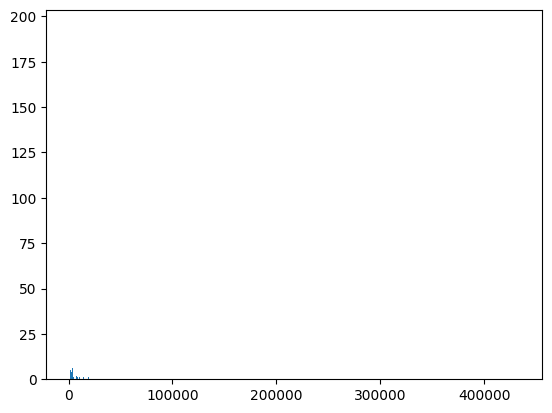

In [18]:
train_values.index
plt.bar(train_values.index,train_values)
plt.show()

In [19]:
test['raw_length'] = test['text'].apply(lambda x:len(x))
test['raw_length']

0        1426
1        3671
2        4134
3         163
4         649
         ... 
83329     477
83330     159
83331     906
83332    5354
83333     310
Name: raw_length, Length: 83334, dtype: int64

In [20]:
test['raw_length'].describe()

count     83334.000000
mean       3571.214774
std        6806.903811
min         100.000000
25%         844.000000
50%        2153.000000
75%        4478.750000
max      428812.000000
Name: raw_length, dtype: float64

In [22]:
test[test['raw_length'] > 4000]

,id,text,raw_length
2,TEST_00002,The COVID-19 pandemic has changed many things ...,4134
5,TEST_00005,"According to the government sector, the meetin...",4483
7,TEST_00007,"According to a social reporter, Hojjatul Islam...",4908
10,TEST_00010,Results from a large study showed the redesign...,4883
12,TEST_00012,The digital-first health strategies adopted by...,6155
...,...,...,...
83309,TEST_83309,Professor Roland Eils and his colleagues from ...,5149
83312,TEST_83312,According to the report of the international g...,5694
83321,TEST_83321,"For a study in the journal eLife, a research t...",4081
83323,TEST_83323,According to the report of the international g...,5509


## Let's following GPT's guide

In [23]:
import pandas as pd

# Load the data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Preview the data
print("Train data:")
print(train_df.head())
print("\nTest data:")
print(test_df.head())

Train data:
            id                                               text  label
0  TRAIN_00000  Israel Parliament to Start Winter Session JERU...      3
1  TRAIN_00001  Two-thirds of business owners say they are pre...      2
2  TRAIN_00002  Story highlightsRed Bull team principal Christ...      1
3  TRAIN_00003  Final respects paid to Arafat Palestinians pay...      3
4  TRAIN_00004  Steelers winning the old fashioned way -- they...      1

Test data:
           id                                               text
0  TEST_00000  According to the regional office, the foreign ...
1  TEST_00001  According to a defense reporter, Foreign Minis...
2  TEST_00002  The COVID-19 pandemic has changed many things ...
3  TEST_00003  Jan Baan launches Web services firm The enterp...
4  TEST_00004  Once considered a niche perk, the four-day wor...


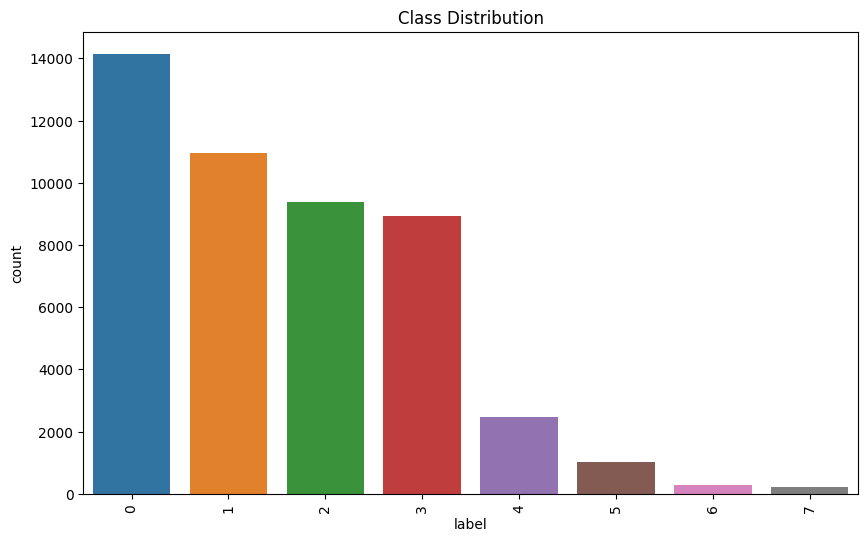

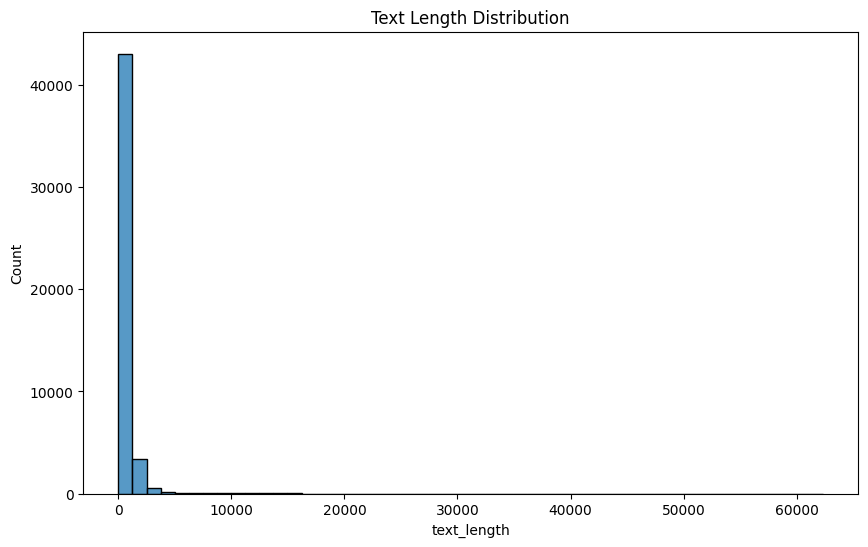

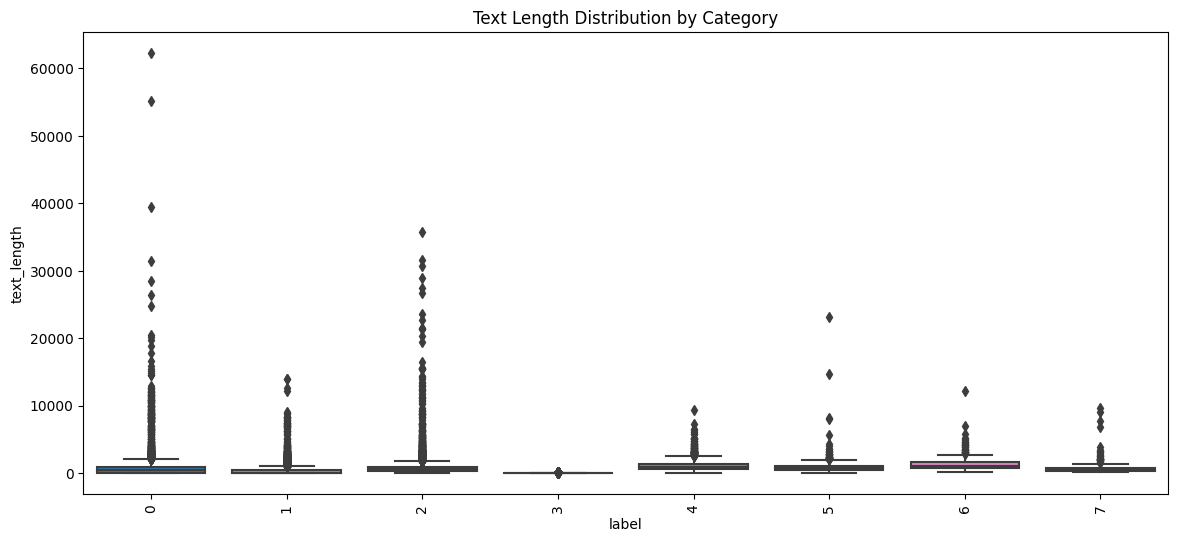

Category: 3

Israel Parliament to Start Winter Session JERUSALEM - Prime Minister Ariel Sharon, who has alienated his right-wing Likud party with plans to withdraw from Gaza, begins a new legislative session fighting for his government's survival.    Lawmakers were scheduled to vote on two motions of no confidence Monday, the first day of Israel's winter parliamentary session... 

Category: 2

Two-thirds of business owners say they are prepared if the outbreak spreads in the U.S.
New research from Paychex, a leading provider of human resources, payroll, benefits, and insurance solutions, reveals that despite the current threat posed by the coronavirus ( COVID-19), 66 percent of U.S. business owners at this early stage say they are prepared should the virus become widespread. Additionally, the research shows that 59 percent of business owners have a business continuity plan in place to address potential business disruptions.
The research, conducted February 28-29, 2020, reflects the sen

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chanmuzi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Category: 3
[('-', 4020), ('#39;s', 1961), ('said', 1617), ('iraq', 1289), ('president', 1227), ('(reuters)', 1177), ('us', 1057), ('new', 1025), ('minister', 964), ('two', 956), ('killed', 918), ('(ap)', 876), ('ap', 827), ('prime', 725), ('u.s.', 698), ('iraqi', 697), ('government', 679), ('people', 673), ('bush', 603), ('said.', 596)] 

Category: 2
[('--', 148816), ('(', 38197), ('$', 27625), ('“', 27598), ('”', 25106), ('``', 23614), ("''", 21644), ('said', 20869), ('new', 16346), ('also', 13644), ('market', 13113), ('million', 12522), ('people', 11718), ('would', 10651), ('covid-19', 10305), ('-', 10070), ('coronavirus', 9949), ('company', 9883), ('one', 9523), ('may', 9341)] 

Category: 1
[('photos:', 20836), ('caption', 18390), ('--', 14159), ('world', 11632), ('best', 10965), ('–', 10507), ('first', 10145), ('one', 7945), ('team', 6525), ('said', 6473), ('open', 6299), ('win', 6203), ('last', 5980), ('two', 5948), ('match', 5564), ('cup', 5280), ('photos', 5187), ('new', 5144),

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Load the data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Analyze the distribution of classes in the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='label')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.show()

# Analyze the distribution of text length
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='text_length', bins=50)
plt.title('Text Length Distribution')
plt.show()

# Analyze the distribution of text length by category
plt.figure(figsize=(14, 6))
sns.boxplot(data=train_df, x='label', y='text_length')
plt.xticks(rotation=90)
plt.title('Text Length Distribution by Category')
plt.show()

# Inspect some sample texts from each category
for category in train_df['label'].unique():
    print(f"Category: {category}\n")
    print(train_df[train_df['label'] == category]['text'].iloc[0], "\n")

# Analyze the most common words in each category
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def most_common_words(texts, n=20):
    words = []
    for text in texts:
        words.extend(text.lower().split())
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

for category in train_df['label'].unique():
    print(f"Category: {category}")
    common_words = most_common_words(train_df[train_df['label'] == category]['text'])
    print(common_words, "\n")


## V3

### SMOTE

In [1]:
import pandas as pd

# 데이터 불러오기
train_df = pd.read_csv("data/train.csv")

# 클래스별 데이터 개수 확인
class_counts = train_df["label"].value_counts()
print(class_counts)

0    14146
1    10961
2     9379
3     8946
4     2461
5     1022
6      278
7      206
Name: label, dtype: int64


In [5]:
test_df = pd.read_csv("data/test.csv")

import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 특수 문자 제거
    text = re.sub(f"[{string.punctuation}]", " ", text)
    
    # 소문자로 변환
    text = text.lower()
    
    # stopwords 제거
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    return text

train_df["preprocessed_text"] = train_df["text"].apply(preprocess_text)
test_df["preprocessed_text"] = test_df["text"].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chanmuzi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# imbalanced-learn 라이브러리 설치
!pip install -U imbalanced-learn

In [6]:
import numpy as np
from transformers import BertTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 토크나이저 초기화
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 텍스트를 숫자로 변환하고 패딩 적용하는 함수
def encode_and_pad_text(texts, tokenizer, max_length=512):
    input_ids = []
    for text in texts:
        encoded = tokenizer.encode(text, max_length=max_length, truncation=True)
        input_ids.append(encoded)
    # 패딩 적용
    input_ids_padded = np.array([np.pad(x, (0, max_length - len(x)), mode='constant') for x in input_ids])
    return input_ids_padded

# 데이터 준비
X = train_df["preprocessed_text"]
y = train_df["label"]

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 텍스트를 숫자로 변환하고 패딩 적용
X_train_encoded = encode_and_pad_text(X_train, tokenizer)
X_val_encoded = encode_and_pad_text(X_val, tokenizer)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

# 결과 확인
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())


After SMOTE:
 2    11317
1    11317
0    11317
3    11317
4    11317
5    11317
7    11317
6    11317
Name: label, dtype: int64


### 클래스 가중치

In [ ]:
import torch

class_counts = train_df["label"].value_counts().sort_index().values
class_weights = 1 / torch.tensor(class_counts, dtype=torch.float)

In [ ]:
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

### SMOTE sample ratio balanced

In [ ]:
from imblearn.over_sampling import SMOTE

# 소수 클래스 증가 비율 설정 (예: 2배)
sampling_strategy = {label: count * 2 for label, count in zip(class_counts.index, class_counts.values)}

# SMOTE 객체 생성 및 적용
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

# 결과 확인
print("After adjusted SMOTE:\n", pd.Series(y_train_resampled).value_counts())


## Valdiation_results v3

In [7]:
validation_result = pd.read_csv('validations/validation_results_v3.csv')

### total Accuracy

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(validation_result["true_label"], validation_result["predicted_label"])
print("Accuracy:", accuracy)


Accuracy: 0.9231012658227848


### 클래스별 정확도

In [9]:
from sklearn.metrics import classification_report

report = classification_report(validation_result["true_label"], validation_result["predicted_label"], output_dict=True)
class_accuracies = {f"Class {i}": report[str(i)]["precision"] for i in range(8)}
print("Class accuracies:", class_accuracies)


Class accuracies: {'Class 0': 0.9028789455428373, 'Class 1': 0.968018018018018, 'Class 2': 0.8628294782140936, 'Class 3': 0.9550309162450815, 'Class 4': 0.9566929133858267, 'Class 5': 0.9102564102564102, 'Class 6': 0.9117647058823529, 'Class 7': 0.9024390243902439}


### Visualize Confusion Matrix

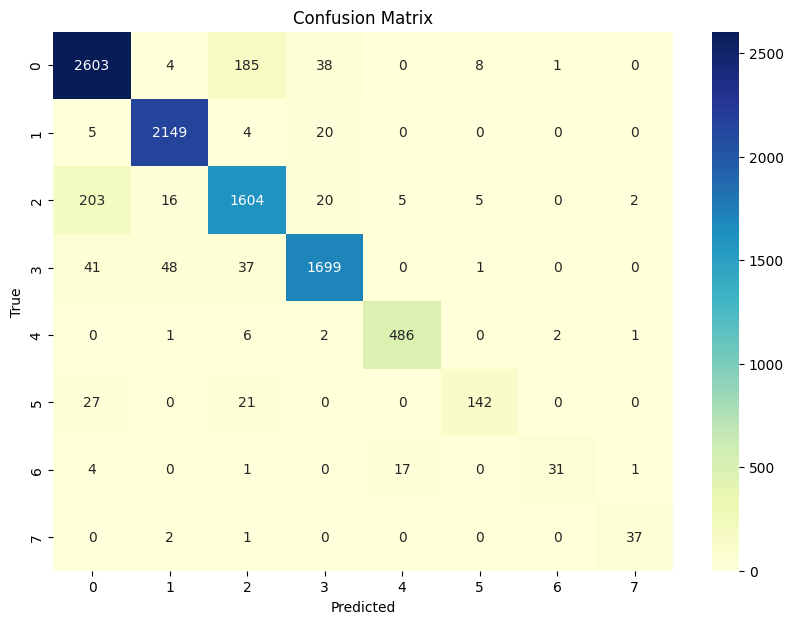

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(validation_result["true_label"], validation_result["predicted_label"])

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=range(8), yticklabels=range(8))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


### 잘못 분류된 예제 확인

In [11]:
misclassified = validation_result[validation_result["true_label"] != validation_result["predicted_label"]]
misclassified_examples = misclassified.sample(5)  # 샘플링 개수를 조절할 수 있습니다.

for index, row in misclassified_examples.iterrows():
    print(f"Text: {row['text']}")
    print(f"True label: {row['true_label']}")
    print(f"Predicted label: {row['predicted_label']}")
    print("-" * 50)


Text: A global pandemic, economic lockdown, and enforced social distancing are hard on everyone’ s mental health. Some people are especially vulnerable.
Black and Latino people are more likely than white people in the US to report anxiety or sadness they struggled to cope with during the pandemic, according to a survey of 1,266 people by the Commonwealth Fund, an organization that works to create better healthcare in the US.
These populations have been disproportionately affected by coronavirus deaths, and the threat of the pandemic could well exacerbate mental health difficulties. Financial worries also likely contribute: These groups were more likely to experience economic difficulties during coronavirus, according to the survey, and research shows a strong link between financial worries and mental health.
Overall, those with a below-average income were the most likely to report anxiety and great sadness during the pandemic, further highlighting the impact of economic security on men

## Valdiation_results v7

In [2]:
import pandas as pd

In [3]:
validation_result = pd.read_csv('validations/validation_results_v7.csv')

In [16]:
validation_result_v8 = pd.read_csv('validations/validation_results_v8.csv')

### total Accuracy

In [4]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(validation_result["true_label"], validation_result["predicted_label"])
print("Accuracy:", accuracy)

Accuracy: 0.9321729957805908


In [17]:
accuracy_v8 = accuracy_score(validation_result_v8["true_label"], validation_result_v8["predicted_label"])
print("Accuracy:", accuracy_v8)

Accuracy: 0.9388185654008439


### 클래스별 정확도

In [5]:
from sklearn.metrics import classification_report

report = classification_report(validation_result["true_label"], validation_result["predicted_label"], output_dict=True)
class_accuracies = {f"Class {i}": report[str(i)]["precision"] for i in range(8)}
print("Class accuracies:", class_accuracies)


Class accuracies: {'Class 0': 0.9177840508115738, 'Class 1': 0.9826563213144682, 'Class 2': 0.8706493506493507, 'Class 3': 0.9544678429140581, 'Class 4': 0.9852320675105485, 'Class 5': 0.8731707317073171, 'Class 6': 0.8571428571428571, 'Class 7': 0.9473684210526315}


In [19]:
report_v8 = classification_report(validation_result_v8['true_label'], validation_result_v8['predicted_label'], output_dict=True)
class_accuracies_v8 = {f"Class {i}": report_v8[str(i)]["precision"] for i in range(8)}
print("Class accuracies_v8", class_accuracies_v8)

Class accuracies_v8 {'Class 0': 0.9320834807216131, 'Class 1': 0.9762773722627737, 'Class 2': 0.9157088122605364, 'Class 3': 0.9220010758472297, 'Class 4': 0.9642147117296223, 'Class 5': 0.9358288770053476, 'Class 6': 0.926829268292683, 'Class 7': 0.9090909090909091}


### Visualize Confusion Matrix

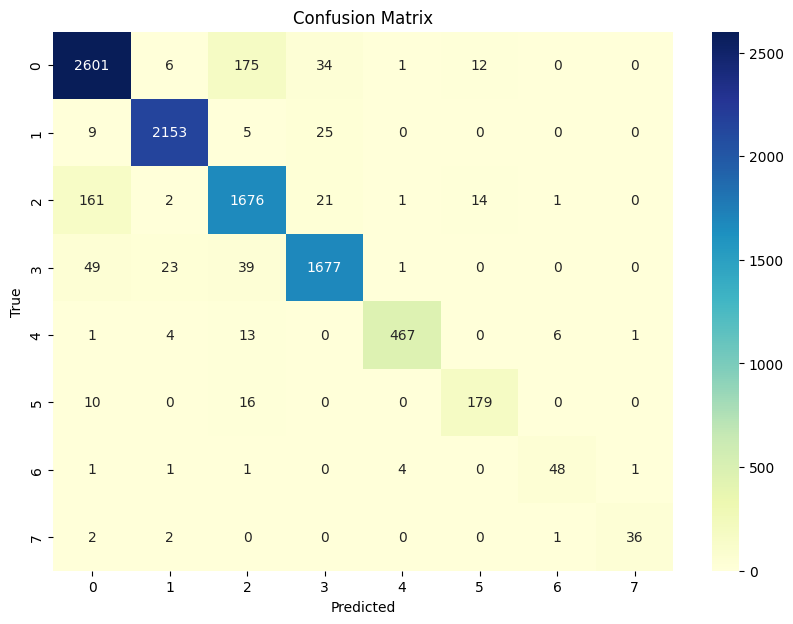

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(validation_result["true_label"], validation_result["predicted_label"])

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=range(8), yticklabels=range(8))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


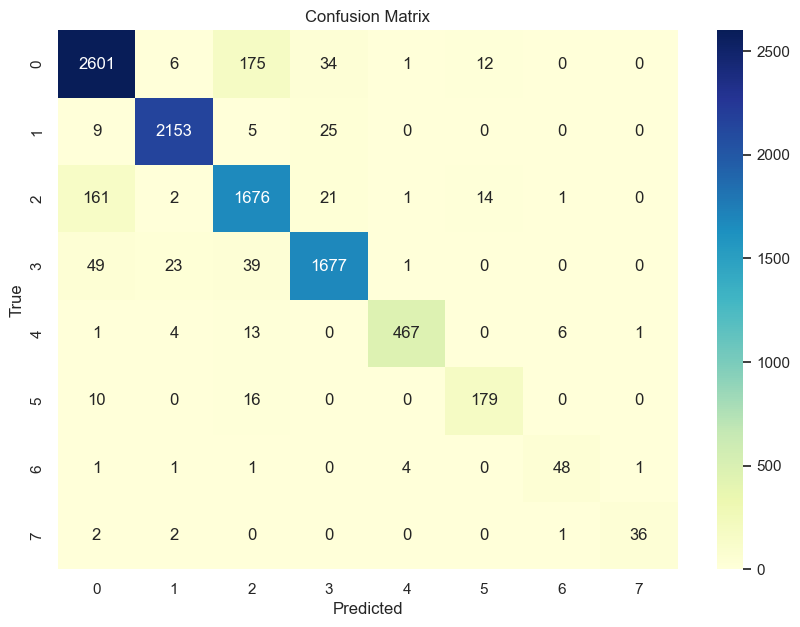

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_v8 = confusion_matrix(validation_result_v8["true_label"], validation_result_v8["predicted_label"])

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=range(8), yticklabels=range(8))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Load validation results into a DataFrame
val_df = pd.DataFrame(validation_result)

# Add a column for text length
val_df['text_length'] = val_df['text'].apply(len)

# Filter the validation results to focus on underperforming classes
underperforming_classes = [0, 2, 5, 6]
filtered_df = val_df[val_df["true_label"].isin(underperforming_classes)]

# Analyze the most common words in each underperforming class
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1),max_features=20)

for class_id in underperforming_classes:
    class_texts = filtered_df[filtered_df['true_label']==class_id]['text']
    X = vectorizer.fit_transform(class_texts)
    word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    word_counts = word_counts.sum().sort_values(ascending=False)

    print(f'Top words in class {class_id}:')
    print(word_counts)
    print("\n")

Top words in class 0:
covid       6953
19          6453
said        4884
new         4381
people      3931
data        3807
health      3572
pandemic    3228
time        3196
work        2380
use         2375
patients    2363
year        2307
like        2265
2020        2224
company     2200
study       2115
research    2102
says        1937
world       1893
dtype: int64


Top words in class 2:
said           6651
year           3677
new            3539
market         3524
million        3325
covid          3289
2020           3219
19             3030
company        3016
people         2908
coronavirus    2510
pandemic       2304
time           1943
health         1940
quarter        1738
business       1716
like           1517
financial      1454
global         1435
000            1406
dtype: int64


Top words in class 5:
climate        651
companies      472
new            418
said           415
global         357
year           325
change         323
covid          320
business    

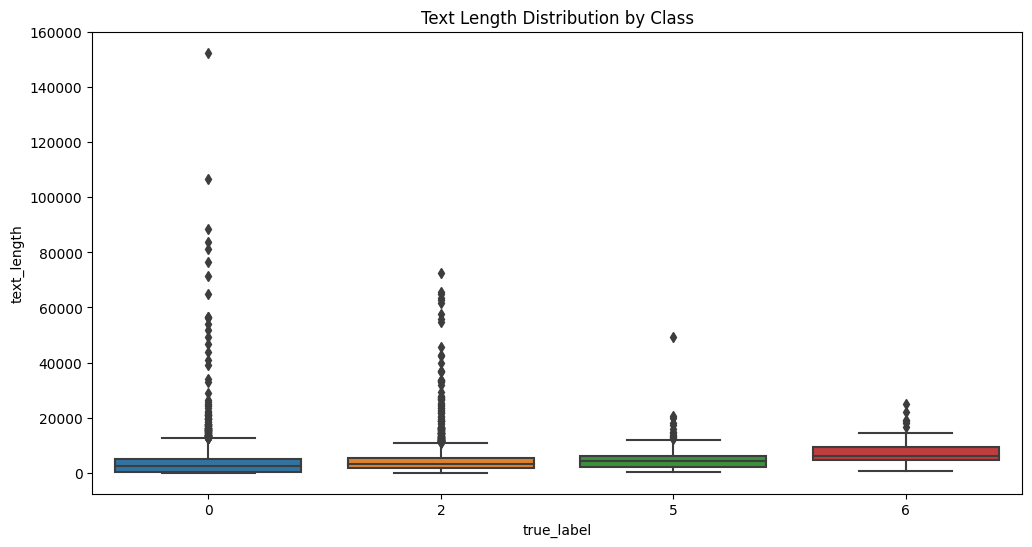

In [12]:
# Visualize the distribution of text lengths in each underperforming class
plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_df, x="true_label", y="text_length")
plt.title("Text Length Distribution by Class")
plt.show()

                  mean        std  min  max  count
true_label                                        
0           183.753623  97.174593   19  256   2829
1           120.916971  96.623987   23  256   2192
2           231.543177  63.294012   23  256   1876
3            52.819452  15.067089   22  137   1789
4           254.630081  13.069038   31  256    492
5           223.590244  76.046283   37  256    205
6           254.339286  12.427648  163  256     56
7           249.780488  21.769833  141  256     41


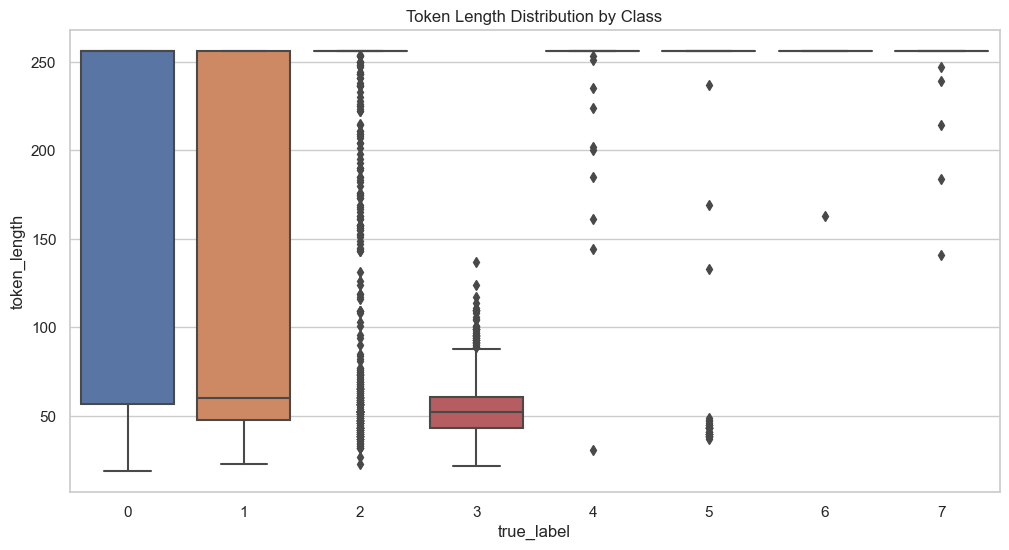

In [15]:
import pandas as pd
from transformers import RobertaTokenizer

# Load your validation results
val_results = pd.read_csv("validations/validation_results_v7.csv")

# Load the RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Tokenize the texts and get the token lengths
val_results["tokenized_text"] = val_results["text"].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=256, truncation=True))
val_results["token_length"] = val_results["tokenized_text"].apply(lambda x: len(x))

# Group by true_label and calculate statistics for token lengths
grouped_lengths = val_results.groupby("true_label")["token_length"].agg(["mean", "std", "min", "max", "count"])
print(grouped_lengths)

# Plot the token length distribution for each class
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=val_results, x="true_label", y="token_length")
plt.title("Token Length Distribution by Class")
plt.show()

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

                  mean         std  min  max  count
true_label                                         
0           330.826794  213.388372   19  512   2829
1           200.942062  210.829712   23  512   2192
2           426.409382  152.828171   23  512   1876
3            52.819452   15.067089   22  137   1789
4           494.544715   58.945451   31  512    492
5           419.190244  169.593366   37  512    205
6           504.214286   47.162279  163  512     56
7           429.926829  115.923766  141  512     41


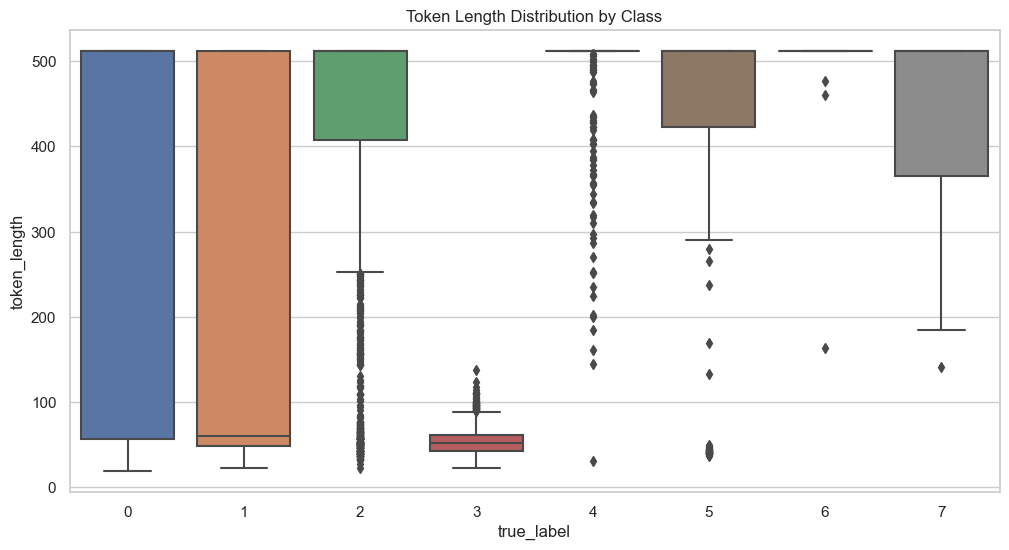

In [14]:
import pandas as pd
from transformers import RobertaTokenizer

# Load your validation results
val_results = pd.read_csv("validations/validation_results_v7.csv")

# Load the RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Tokenize the texts and get the token lengths
val_results["tokenized_text"] = val_results["text"].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=256, truncation=True))
val_results["token_length"] = val_results["tokenized_text"].apply(lambda x: len(x))

# Group by true_label and calculate statistics for token lengths
grouped_lengths = val_results.groupby("true_label")["token_length"].agg(["mean", "std", "min", "max", "count"])
print(grouped_lengths)

# Plot the token length distribution for each class
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=val_results, x="true_label", y="token_length")
plt.title("Token Length Distribution by Class")
plt.show()


## v11 analysis

In [21]:
validation_result_v11 = pd.read_csv('validations/validation_results_v11.csv')

In [22]:
from sklearn.metrics import accuracy_score

accuracy_v11 = accuracy_score(validation_result_v11["true_label"], validation_result_v11["predicted_label"])
print("Accuracy:", accuracy_v11)

Accuracy: 0.9399789029535865


In [23]:
from sklearn.metrics import classification_report

report_v11 = classification_report(validation_result_v11["true_label"], validation_result_v11["predicted_label"], output_dict=True)
class_accuracies_v11 = {f"Class {i}": report_v11[str(i)]["precision"] for i in range(8)}
print("Class accuracies:", class_accuracies_v11)


Class accuracies: {'Class 0': 0.9238754325259516, 'Class 1': 0.9839963420210334, 'Class 2': 0.9081081081081082, 'Class 3': 0.9476082004555809, 'Class 4': 0.9875259875259875, 'Class 5': 0.8584905660377359, 'Class 6': 0.7727272727272727, 'Class 7': 0.9736842105263158}


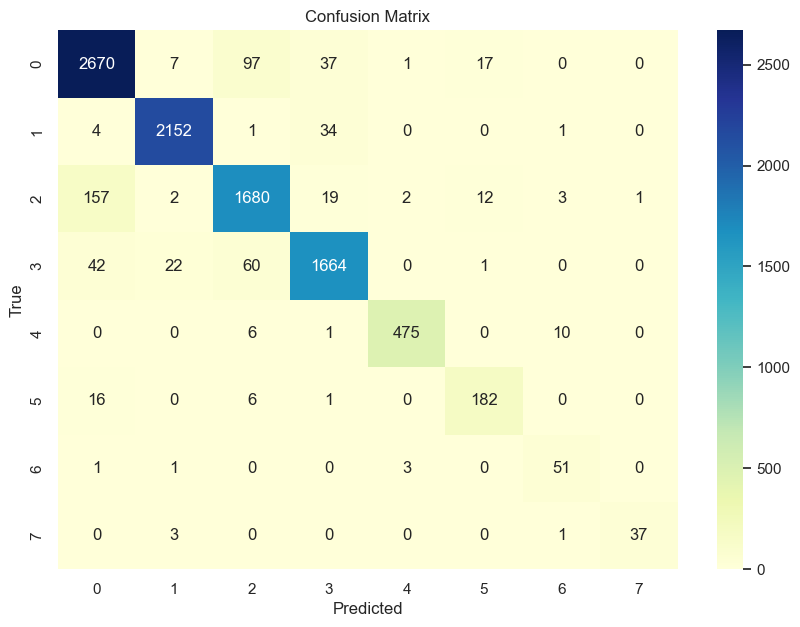

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_v11 = confusion_matrix(validation_result_v11["true_label"], validation_result_v11["predicted_label"])

plt.figure(figsize=(10, 7))
sns.heatmap(cm_v11, annot=True, fmt="d", cmap="YlGnBu", xticklabels=range(8), yticklabels=range(8))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## v17 test analysis

In [1]:
import pandas as pd

submission_df = pd.read_csv('submissions/submission_v17.csv')
test_df = pd.read_csv('data/test.csv')

In [4]:
test_df['label'] = submission_df['label']
test_df.head()

,id,text,label
0,TEST_00000,"According to the regional office, the foreign ...",3
1,TEST_00001,"According to a defense reporter, Foreign Minis...",2
2,TEST_00002,The COVID-19 pandemic has changed many things ...,0
3,TEST_00003,Jan Baan launches Web services firm The enterp...,0
4,TEST_00004,"Once considered a niche perk, the four-day wor...",0


In [32]:
label_count = test_df['label'].value_counts()

In [33]:
label_count['percent'] = label_count.apply(lambda x: x/len(test_df)*100)

In [35]:
label_count['percent'].sort_index()

0    56.917945
1     3.532772
2    29.397365
3     7.873137
4     0.223198
5     1.539588
6     0.307198
7     0.208798
Name: label, dtype: float64

In [27]:
train_df = pd.read_csv('data/train.csv')

In [28]:
train_count = train_df['label'].value_counts()

In [30]:
train_count['percent'] = train_count.apply(lambda x: x/len(train_df)*100)

In [31]:
train_count['percent']

0    29.844511
1    23.124960
2    19.787337
3    18.873816
4     5.192093
5     2.156164
6     0.586510
7     0.434608
Name: label, dtype: float64